In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [35]:
foo = pd.read_csv('data/hosp_1.csv')
bar = pd.read_csv('data/hosp_2.csv')
baz = pd.read_csv('data/csv_parkNames_1.csv')
qux = pd.read_csv('data/csv_parkNames_2.csv')
barbaz = pd.read_csv('data/museums.csv')

In [51]:
museum = barbaz.drop([0,1])
museum

,zip_code,life_exp,count
2,90002,76.327273,468
3,90003,76.020000,436
4,90004,82.366667,392
5,90005,80.590000,394
6,90006,79.111765,400
...,...,...,...
1522,96151,80.100000,37
1523,96155,80.400000,37
1524,96158,74.600000,37
1525,96160,78.100000,76


In [38]:
hosp = foo.append(bar).drop(columns=['title'])
hosp = hosp.replace(regex=r'\[', value='').replace(regex=r'\]', value='')
hosp

,zip_code,life_exp,count
0,90002,76.5375,7
1,90003,76.56060606,22
2,90004,81.92857143,57
3,90005,80.48181818,55
4,90006,78.62413793,12
...,...,...,...
1371,96151,80.1,20
1372,96155,80.4,17
1373,96158,74.6,20
1374,96160,78.1,21


In [39]:
park = baz.append(qux).drop(columns=['title'])
park = park.replace(regex=r'\[', value='').replace(regex=r'\]', value='')
park

,zip_code,life_exp,count
0,90002,76.5375,19
1,90003,76.56060606,19
2,90004,81.92857143,182
3,90005,80.48181818,178
4,90006,78.62413793,45
...,...,...,...
1332,96151,80.1,7
1333,96155,80.4,137
1334,96158,74.6,7
1335,96160,78.1,7


In [56]:
merge1 = hosp.merge(park, left_on='zip_code', right_on='zip_code', suffixes=('_hosp', '_park'))
merge1

,zip_code,life_exp_hosp,count_hosp,life_exp_park,count_park
0,90002,76.5375,7,76.5375,19
1,90003,76.56060606,22,76.56060606,19
2,90004,81.92857143,57,81.92857143,182
3,90005,80.48181818,55,80.48181818,178
4,90006,78.62413793,12,78.62413793,45
...,...,...,...,...,...
2370,96151,80.1,20,80.1,7
2371,96155,80.4,17,80.4,137
2372,96158,74.6,20,74.6,7
2373,96160,78.1,21,78.1,7


In [62]:
merge_data = merge1.merge(museum, left_on='zip_code', right_on='zip_code')
merged = merge_data.iloc[:,[0,1,2,4,6]].rename(columns={'life_exp_hosp':'life_exp','count':'count_museum'})
merged

,zip_code,life_exp,count_hosp,count_park,count_museum
0,90002,76.5375,7,19,468
1,90003,76.56060606,22,19,436
2,90004,81.92857143,57,182,392
3,90005,80.48181818,55,178,394
4,90006,78.62413793,12,45,400
...,...,...,...,...,...
1545,96151,80.1,20,7,37
1546,96155,80.4,17,137,37
1547,96158,74.6,20,7,37
1548,96160,78.1,21,7,76


In [175]:
merged.to_html('exported.html')

In [28]:
hospitals = foo.iloc[:,[1,2]].replace(regex=r'\[', value='').replace(regex=r'\]', value='').append(bar.iloc[:,[1,2]].replace(regex=r'\[', value='').replace(regex=r'\]', value=''))
parks = bar.iloc[:,[1,2]].replace(regex=r'\[', value='').replace(regex=r'\]', value='')

In [29]:
hospitals

,life_exp,count
0,76.5375,7
1,76.56060606,22
2,81.92857143,57
3,80.48181818,55
4,78.62413793,12
...,...,...
1371,80.1,20
1372,80.4,17
1373,74.6,20
1374,78.1,21


In [5]:
parks.iloc[:,0].astype('float')

0      76.537500
1      76.560606
2      81.928571
3      80.481818
4      78.624138
         ...    
994    83.300000
995    79.520000
996    79.400000
997    79.550000
998    78.200000
Name: [77.73333333], Length: 999, dtype: float64

In [6]:
parks.iloc[:,1]

0       19
1       19
2      182
3      178
4       45
      ... 
994     12
995     70
996      5
997    174
998     70
Name: 19, Length: 999, dtype: int64

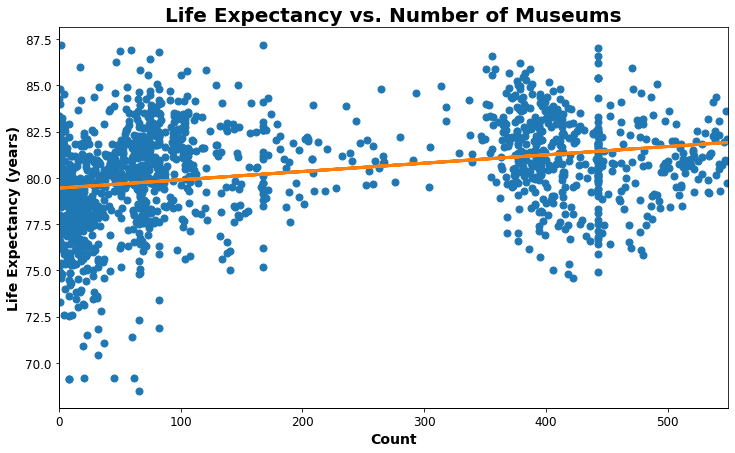

In [174]:
(slope, intercept, _, _, _) = linregress(merged['count_museum'],merged['life_exp'].astype('float'))
fit = slope * merged['count_museum'] + intercept

fig, ax = plt.subplots(figsize=(12,7))

plt.title("Life Expectancy vs. Number of Museums", fontsize=20, fontweight="bold")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.spines['top'].set_visible(15)
ax.spines['right'].set_visible(15)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

ax.set_xlim(0, 550)
#ax.set_ylim(0, 1000)

ax.set_xlabel("Count", fontsize=14, fontweight="bold")
ax.set_ylabel("Life Expectancy (years)", fontsize=14, fontweight="bold")

ax.plot(merged['count_museum'],merged['life_exp'].astype('float'), linewidth=0, marker='o', markersize=7)
ax.plot(merged['count_museum'], fit, linewidth=3)

plt.show()

fig.savefig('museum.png')

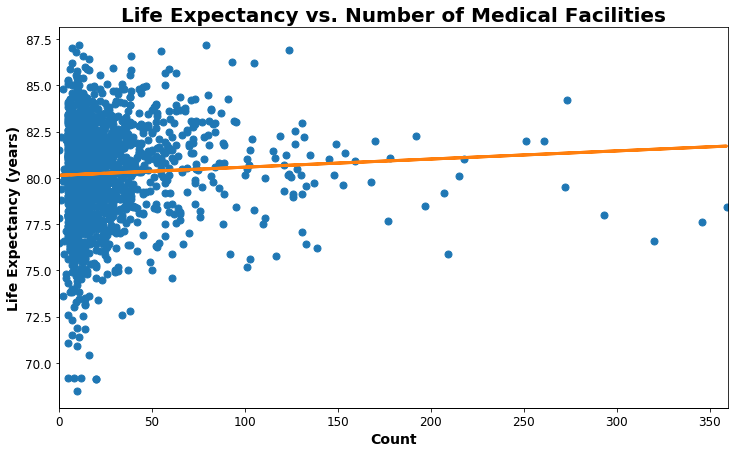

In [169]:
(slope, intercept, _, _, _) = linregress(merged['count_hosp'],merged['life_exp'].astype('float'))
fit = slope * merged['count_hosp'] + intercept

fig, ax = plt.subplots(figsize=(12,7))

plt.title("Life Expectancy vs. Number of Medical Facilities", fontsize=20, fontweight="bold")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.spines['top'].set_visible(15)
ax.spines['right'].set_visible(15)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

ax.set_xlim(0, 360)
#ax.set_ylim(0, 1000)

ax.set_xlabel("Count", fontsize=14, fontweight="bold")
ax.set_ylabel("Life Expectancy (years)", fontsize=14, fontweight="bold")

ax.plot(merged['count_hosp'],merged['life_exp'].astype('float'), linewidth=0, marker='o', markersize=7)
ax.plot(merged['count_hosp'], fit, linewidth=3)

plt.show()

fig.savefig('hosp.png')

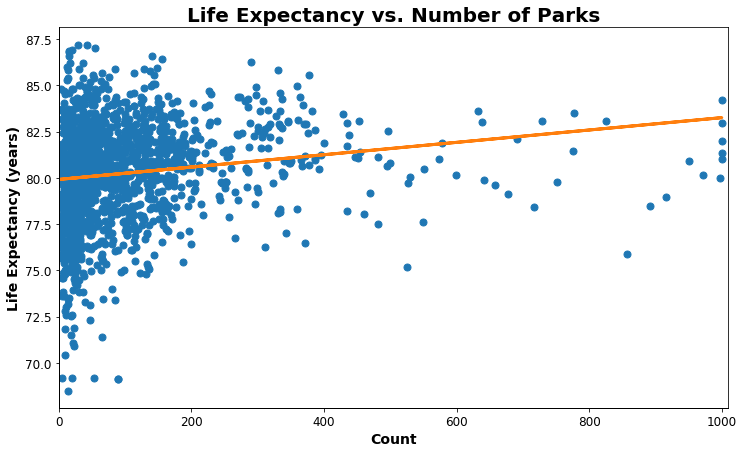

In [172]:
(slope, intercept, _, _, _) = linregress(merged['count_park'],merged['life_exp'].astype('float'))
fit = slope * merged['count_park'] + intercept

fig, ax = plt.subplots(figsize=(12,7))

plt.title("Life Expectancy vs. Number of Parks", fontsize=20, fontweight="bold")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.spines['top'].set_visible(15)
ax.spines['right'].set_visible(15)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

ax.set_xlim(0, 1010)
#ax.set_ylim(0, 1000)

ax.set_xlabel("Count", fontsize=14, fontweight="bold")
ax.set_ylabel("Life Expectancy (years)", fontsize=14, fontweight="bold")

ax.plot(merged['count_park'],merged['life_exp'].astype('float'), linewidth=0, marker='o', markersize=7)
ax.plot(merged['count_park'], fit, linewidth=3)

plt.show()

fig.savefig('park.png')

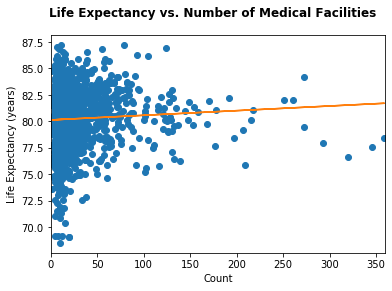

In [104]:
(slope, intercept, _, _, _) = linregress(merged['count_hosp'],merged['life_exp'].astype('float'))
fit = slope * merged['count_hosp'] + intercept

fig, ax = plt.subplots()

fig.suptitle("Life Expectancy vs. Number of Medical Facilities", fontsize=12, fontweight="bold")

ax.set_xlim(0, 360)
#ax.set_ylim(0, 1000)

ax.set_xlabel("Count")
ax.set_ylabel("Life Expectancy (years)")

ax.plot(merged['count_hosp'],merged['life_exp'].astype('float'), linewidth=0, marker='o')
ax.plot(merged['count_hosp'], fit)

plt.show()

fig.savefig('hosp.png')

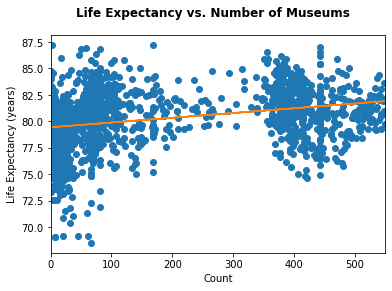

In [103]:
(slope, intercept, _, _, _) = linregress(merged['count_museum'],merged['life_exp'].astype('float'))
fit = slope * merged['count_museum'] + intercept

fig, ax = plt.subplots()

fig.suptitle("Life Expectancy vs. Number of Museums", fontsize=12, fontweight="bold")

ax.set_xlim(0, 550)
#ax.set_ylim(0, 1000)

ax.set_xlabel("Count")
ax.set_ylabel("Life Expectancy (years)")

ax.plot(merged['count_museum'],merged['life_exp'].astype('float'), linewidth=0, marker='o')
ax.plot(merged['count_museum'], fit)

plt.show()

fig.savefig('museum.png')

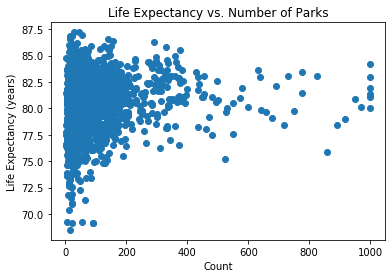

In [80]:
(slope, intercept, _, _, _) = linregress(merged['count_park'],merged['life_exp'].astype('float'))
fit = slope * merged['count_park'] + intercept

plt.scatter(merged['count_park'],merged['life_exp'].astype('float'))

plt.title('Life Expectancy vs. Number of Parks')
plt.xlabel('Count')
plt.ylabel('Life Expectancy (years)')

plt.show()

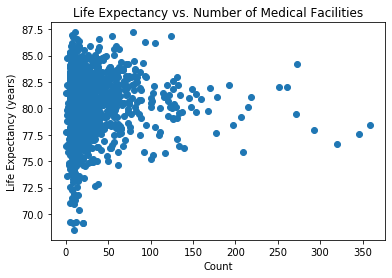

<Figure size 432x288 with 0 Axes>

In [76]:
plt.scatter(merged['count_hosp'],merged['life_exp'].astype('float'))

plt.title('Life Expectancy vs. Number of Medical Facilities')
plt.xlabel('Count')
plt.ylabel('Life Expectancy (years)')

plt.show()

plt.savefig('hosp.png')

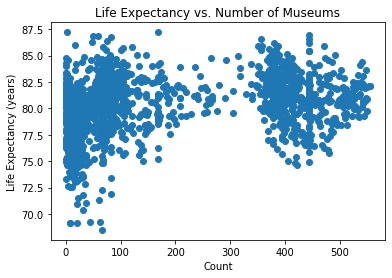

In [75]:
plt.scatter(merged['count_museum'],merged['life_exp'].astype('float'))

plt.title('Life Expectancy vs. Number of Museums')
plt.xlabel('Count')
plt.ylabel('Life Expectancy (years)')

plt.show()